In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# load data
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.duplicated().sum()

0

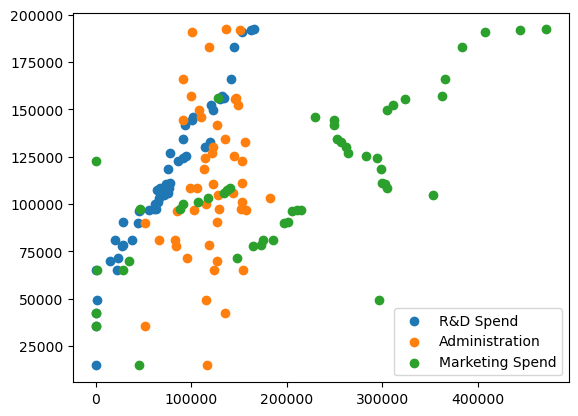

In [9]:
plt.scatter(x=data["R&D Spend"] , y=data["Profit"])
plt.scatter(x=data["Administration"] , y=data["Profit"])
plt.scatter(x=data["Marketing Spend"] , y=data["Profit"])
plt.legend(["R&D Spend" , "Administration" , "Marketing Spend"])
plt.show()

In [12]:
data.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


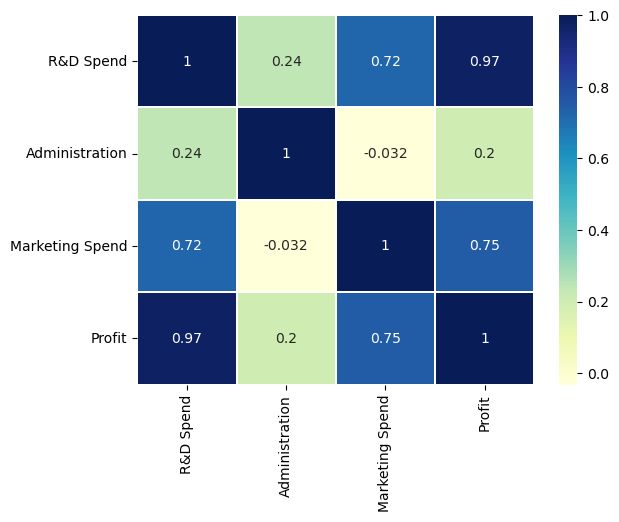

In [14]:
sns.heatmap(data.corr(numeric_only=True) , cmap='YlGnBu' ,annot=True ,linewidths='0.2')
plt.show()

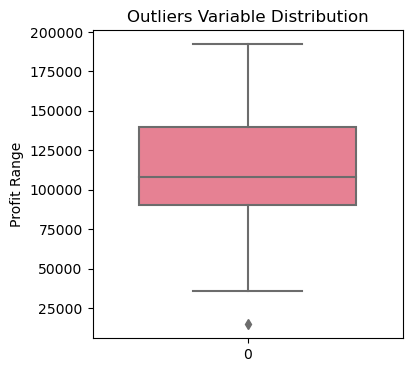

In [15]:
outliers = "Profit"
plt.rcParams['figure.figsize'] = [4,4]
sns.boxplot(data=data[outliers] , orient='v' , palette='husl' , width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.show()

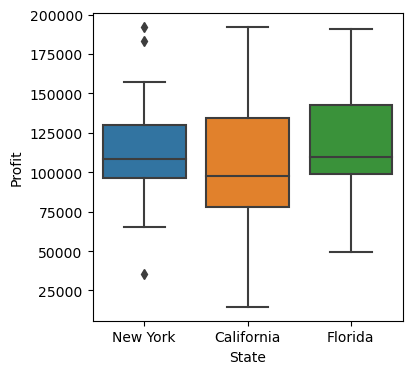

In [16]:
sns.boxplot(x="State" , y="Profit" , data=data)
plt.show()

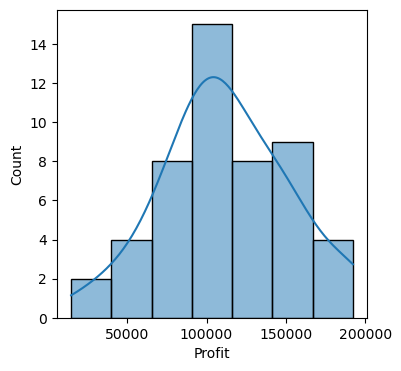

In [17]:
sns.histplot(data = data["Profit"] , kde=True)
plt.show()

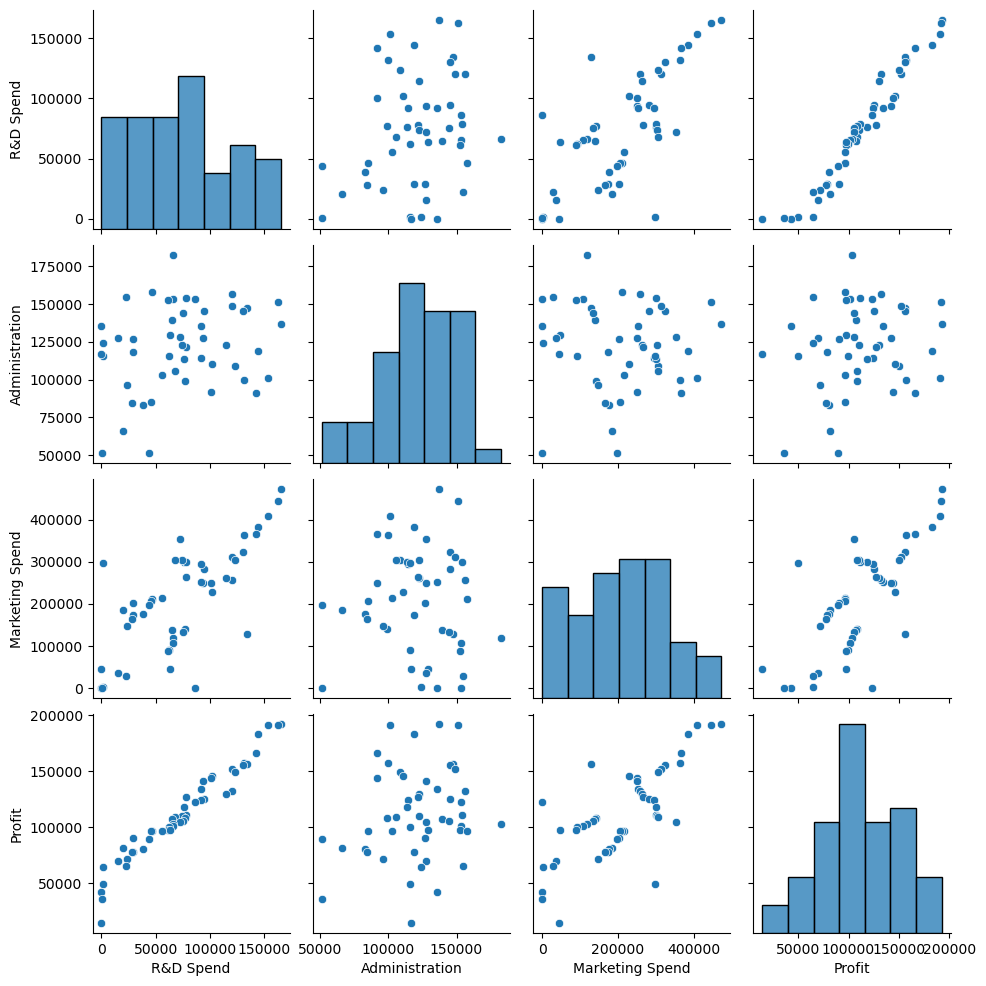

In [18]:
sns.pairplot(data)
plt.show()

In [19]:
# Preparing data (split data)
data_without_state = data.drop(columns = "State" , axis=0)
X = data_without_state.iloc[ : , :-1 ]
y = data_without_state.iloc[ : , -1]

# Convert X and y to array ...
X = np.array(X)
y = np.array(y)
y = y.reshape(-1,1)

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size=0.30)

In [21]:
model = LinearRegression()
model.fit(X_train , y_train)
predict = model.predict(X_test)

In [22]:
training_data_score = model.score(X_train , y_train)
print("Model Score in Training Data : " , training_data_score)

print("******************************************************")

testing_data_score = model.score(X_test , y_test)
print("Model Score in testing Data : " , testing_data_score)

Model Score in Training Data :  0.9508557563847194
******************************************************
Model Score in testing Data :  0.9418819530700164


In [23]:
r2Score = r2_score(y_test , predict)
print( "R2 Score : " , r2Score*100)

R2 Score :  94.18819530700165


In [24]:
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test , predict)
print( "Mean Absolute Error : " ,  MeanAbsoluteError)
# If the mean absolute error result is close to zero then this is the best

Mean Absolute Error :  7222.594346965517


In [25]:
MeanSquerdError = mean_squared_error(y_test , predict , squared=True)
print( "Mean Squerd Error : " ,  MeanSquerdError*100)

Mean Squerd Error :  8177214943.547155


In [26]:
RootMeanSquerdError = np.sqrt(mean_squared_error(y_test , predict))
print( "Root Mean Squerd Error : " ,  RootMeanSquerdError*100)

Root Mean Squerd Error :  904279.5443637524


In [27]:
# To Add "predict" Column in (data) 
data_after_predict = pd.DataFrame(data={"Predicted_Profit " : predict.flatten() , "Actual Value y ":y_test.flatten() , 
                                        "Difference Actual & Predict " : y_test.flatten() - predict.flatten() })
data_after_predict.head()

,Predicted_Profit,Actual Value y,Difference Actual & Predict
0,125972.148263,134307.35,8335.201737
1,85471.922710,81005.76,-4466.162710
2,98924.151683,99937.59,1013.438317
3,46639.786287,64926.08,18286.293713
4,128142.124732,125370.37,-2771.754732
